In [1]:
import sklearn
import sklearn.cluster
import sklearn.datasets.samples_generator
import numpy as np
import inspect
import matplotlib.pyplot as plt

/home/liz0f/app/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [5]:

# Load data in X  
batch_size = 45
centers = [[1, 1], [-2, -1], [1, -2], [1, 9]] 
n_clusters = len(centers) 
X, labels_true = sklearn.datasets.samples_generator.make_blobs(n_samples = 3000, 
                            centers = centers, 
                            cluster_std = 0.9) 
  
# perform the mini batch K-means 
mbk = sklearn.cluster.MiniBatchKMeans(init ='k-means++', n_clusters = 4, 
                      batch_size = batch_size, n_init = 10, 
                      max_no_improvement = 10, verbose = True) 
  
mbk.fit(X) 

kmeans=sklearn.cluster.KMeans(init="k-means++",n_clusters=4,n_init=10,verbose=True)
kmeans.fit(X)

Init 1/10 with method: k-means++
Inertia for init 1/10: 199.669631
Init 2/10 with method: k-means++
Inertia for init 2/10: 224.063406
Init 3/10 with method: k-means++
Inertia for init 3/10: 197.635833
Init 4/10 with method: k-means++
Inertia for init 4/10: 202.465833
Init 5/10 with method: k-means++
Inertia for init 5/10: 203.283926
Init 6/10 with method: k-means++
Inertia for init 6/10: 207.064404
Init 7/10 with method: k-means++
Inertia for init 7/10: 307.960138
Init 8/10 with method: k-means++
Inertia for init 8/10: 346.400678
Init 9/10 with method: k-means++
Inertia for init 9/10: 300.134865
Init 10/10 with method: k-means++
Inertia for init 10/10: 204.929301
Minibatch iteration 1/6700: mean batch inertia: 1.291728, ewa inertia: 1.291728 
Minibatch iteration 2/6700: mean batch inertia: 1.930083, ewa inertia: 1.310873 
Minibatch iteration 3/6700: mean batch inertia: 1.850686, ewa inertia: 1.327062 
Minibatch iteration 4/6700: mean batch inertia: 1.491422, ewa inertia: 1.331991 
Mini

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=True)

In [6]:
def argsort_cluster(cluster_centers):
    cluster_centers=cluster_centers.astype(np.float64)
    cluster_centers=cluster_centers.view('f8,f8')
    order=np.argsort(cluster_centers,order=["f0","f1"],axis=0).squeeze()
    return order

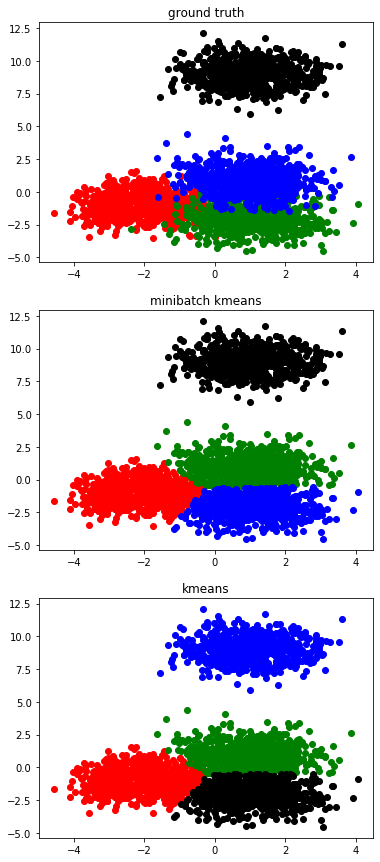

In [7]:
def plot_cluster_result(X,labels,order,title,ax):
    colormap=['r','g','b','black']
    for i,c in enumerate(order):
        X_sub=X[labels==c,:]
        ax.plot(X_sub[:,0],X_sub[:,1],color=colormap[i],marker='o',linestyle='')
    ax.set_title(title)
fig,axes=plt.subplots(3,1)
plot_cluster_result(X,labels_true,argsort_cluster(np.array(centers)),"ground truth",axes[0])
plot_cluster_result(X,mbk.labels_,argsort_cluster(mbk.cluster_centers_),"minibatch kmeans",axes[1])
plot_cluster_result(X,kmeans.labels_,argsort_cluster(kmeans.cluster_centers_),"kmeans",axes[2])
fig.set_size_inches((6,15))